In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('Position_Salaries.csv')
X=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values


In [3]:
y=y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [4]:
#feature scaling
from sklearn.preprocessing import StandardScaler #transform between(-3,3)
sc=StandardScaler()
sc2=StandardScaler()
X=sc.fit_transform(X)
y=sc2.fit_transform(y)

In [5]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [6]:
#training the SVR Model on the whole dataset
from sklearn.svm import SVR
regressor=SVR(kernel="rbf")
regressor.fit(X,y)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [7]:
sc2.inverse_transform(regressor.predict(sc.transform([[6.5]])))

array([170370.0204065])

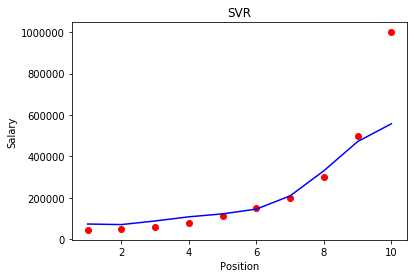

In [8]:
#visualising the results of svr
plt.scatter(sc.inverse_transform(X),sc2.inverse_transform(y), color="red")
plt.plot(sc.inverse_transform(X) , sc2.inverse_transform(regressor.predict(X)), color="blue")
plt.title("SVR")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()

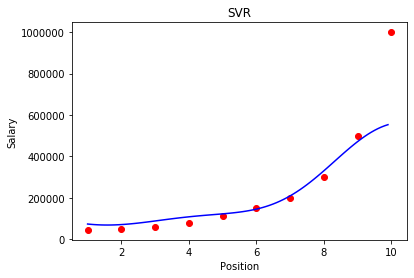

In [9]:
#visualising the results of svr for higher values
X_grid=np.arange(min(sc.inverse_transform(X)),max(sc.inverse_transform(X)),0.1)
X_grid=X_grid.reshape(len(X_grid),1)
plt.scatter(sc.inverse_transform(X),sc2.inverse_transform(y), color="red")
plt.plot(X_grid , sc2.inverse_transform(regressor.predict(sc.transform(X_grid))), color="blue")
plt.title("SVR")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()